# Cost of Living Index by Country

his report presents an analysis of cost of living indices across countries. A Random Forest classification model is employed to predict cost of living categories (Low, Medium, High). To address class imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) is applied. Model performance is optimized through hyperparameter tuning.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Load, Understand, and Analyze the Data

Dataset URL: "https://raw.githubusercontent.com/cogxen/datasets/main/cost-of-living-index-by-country/cost-of-living-2024.csv"

- Load the dataset
- Assign the dataset to a variable
- Set plot style (seaborn)

In [2]:
costs_url = "https://raw.githubusercontent.com/cogxen/datasets/main/cost-of-living-index-by-country/cost-of-living-2024.csv"

# Assign the dataset
costs = pd.read_csv(costs_url)

# Set the plot style
sns.set(style='whitegrid')

- Display the first five (5) rows of the DataFrame

In [3]:
costs.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


- Sort the data from highest to lowest by `Cost of Living Index` column
- Display the first top ten (10) highest cost of living countries

In [4]:
sorted_costs = costs.sort_values(by="Cost of Living Index", ascending=False)

In [5]:
top_10 = sorted_costs.head(10)
top_10[["Country", "Cost of Living Index"]]

,Country,Cost of Living Index
0,Switzerland,101.1
1,Bahamas,85.0
2,Iceland,83.0
3,Singapore,76.7
4,Barbados,76.6
5,Norway,76.0
6,Denmark,72.3
7,Hong Kong (China),70.8
8,United States,70.4
9,Australia,70.2


'Switzerland' exhibits the highest Cost of Living Index at **101.1**, indicating substantially elevated living expenses relative to the other countries analyzed. The data suggests a potential correlation between geographic region and cost of living, with European nations such as 'Switzerland', 'Iceland', 'Norway', and 'Denmark' occupying the upper echelons, while the 'Bahamas' and 'Barbados' represent distinct regional cost profiles.

- Display the least ten (10) cheapest cost of living countries

In [6]:
least_10 = sorted_costs.tail(10)
least_10[["Country", "Cost of Living Index"]]

,Country,Cost of Living Index
111,Nepal,25.5
112,Paraguay,25.4
113,Madagascar,24.5
114,Syria,24.0
115,Tanzania,23.8
116,Bangladesh,22.5
117,India,21.2
118,Egypt,21.0
119,Libya,20.4
120,Pakistan,18.8


It indicates that the majority of countries with the lowest cost of living are concentrated in Asia and Africa, with the exception of 'Paraguay' in South America. The Cost of Living Index ranges from a low of **18.8** in 'Pakistan' to a high of **25.5** in 'Nepal', signifying a substantial disparity in living expenses across these nations. The clustering of low-cost countries within specific geographic regions suggests a potential correlation between location and cost of living.

## Visualization

- Top Expensive Countries
- Top Cheapest Countries

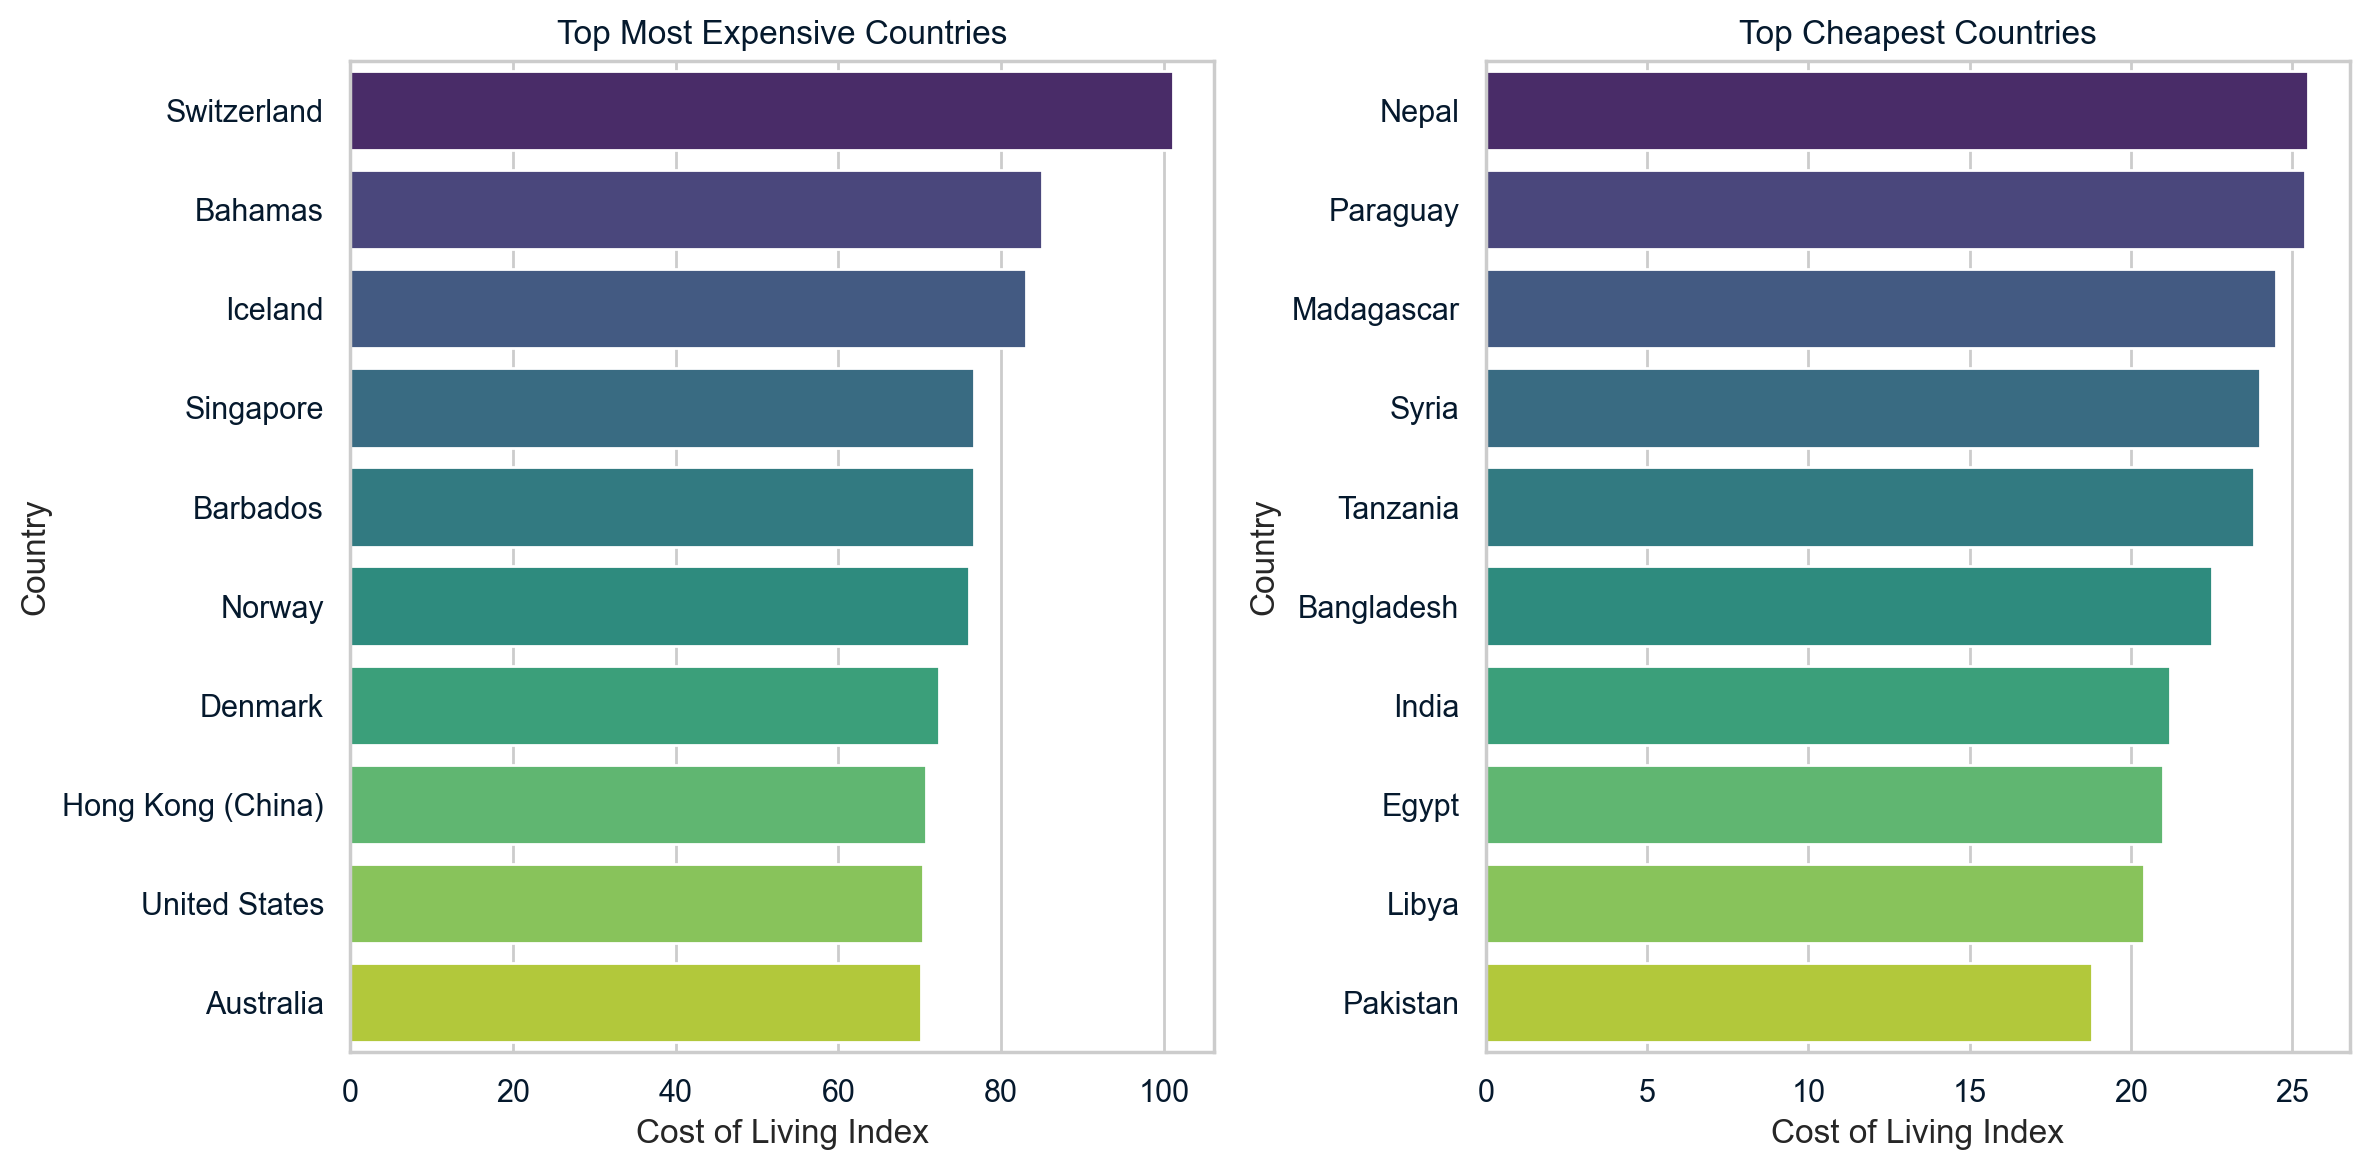

In [7]:
# Figure Size for the Plot
plt.figure(figsize=(12, 6))

# Plot for the most expensive countries
plt.subplot(1, 2, 1)
sns.barplot(x='Cost of Living Index', y='Country', data=top_10, palette='viridis')
plt.title('Top Most Expensive Countries')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')

# Plot for the cheapest countries
plt.subplot(1, 2, 2)
sns.barplot(x='Cost of Living Index', y='Country', data=least_10, palette='viridis')
plt.title('Top Cheapest Countries')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

- Analyze top and least countries by the following categories:
    - `Groceries Index`
    - `Restaurant Price Index`
    - `Rent Index`

In [8]:
# Function to create the plots
def plot_index(index_name):
    
    # Create the plot for the top 10 countries
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=index_name, y='Country', data=top_10, palette='viridis')
    plt.title(f'Top 10 Countries by {index_name}')
    plt.xlabel(index_name)
    plt.ylabel('Country')
    
    # Create the plot for the least 10 countries
    plt.subplot(1, 2, 2)
    sns.barplot(x=index_name, y='Country', data=least_10, palette='viridis')
    plt.title(f'Cheapest 10 Countries by {index_name}')
    plt.xlabel(index_name)
    plt.ylabel('Country')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

- `Groceries Index`

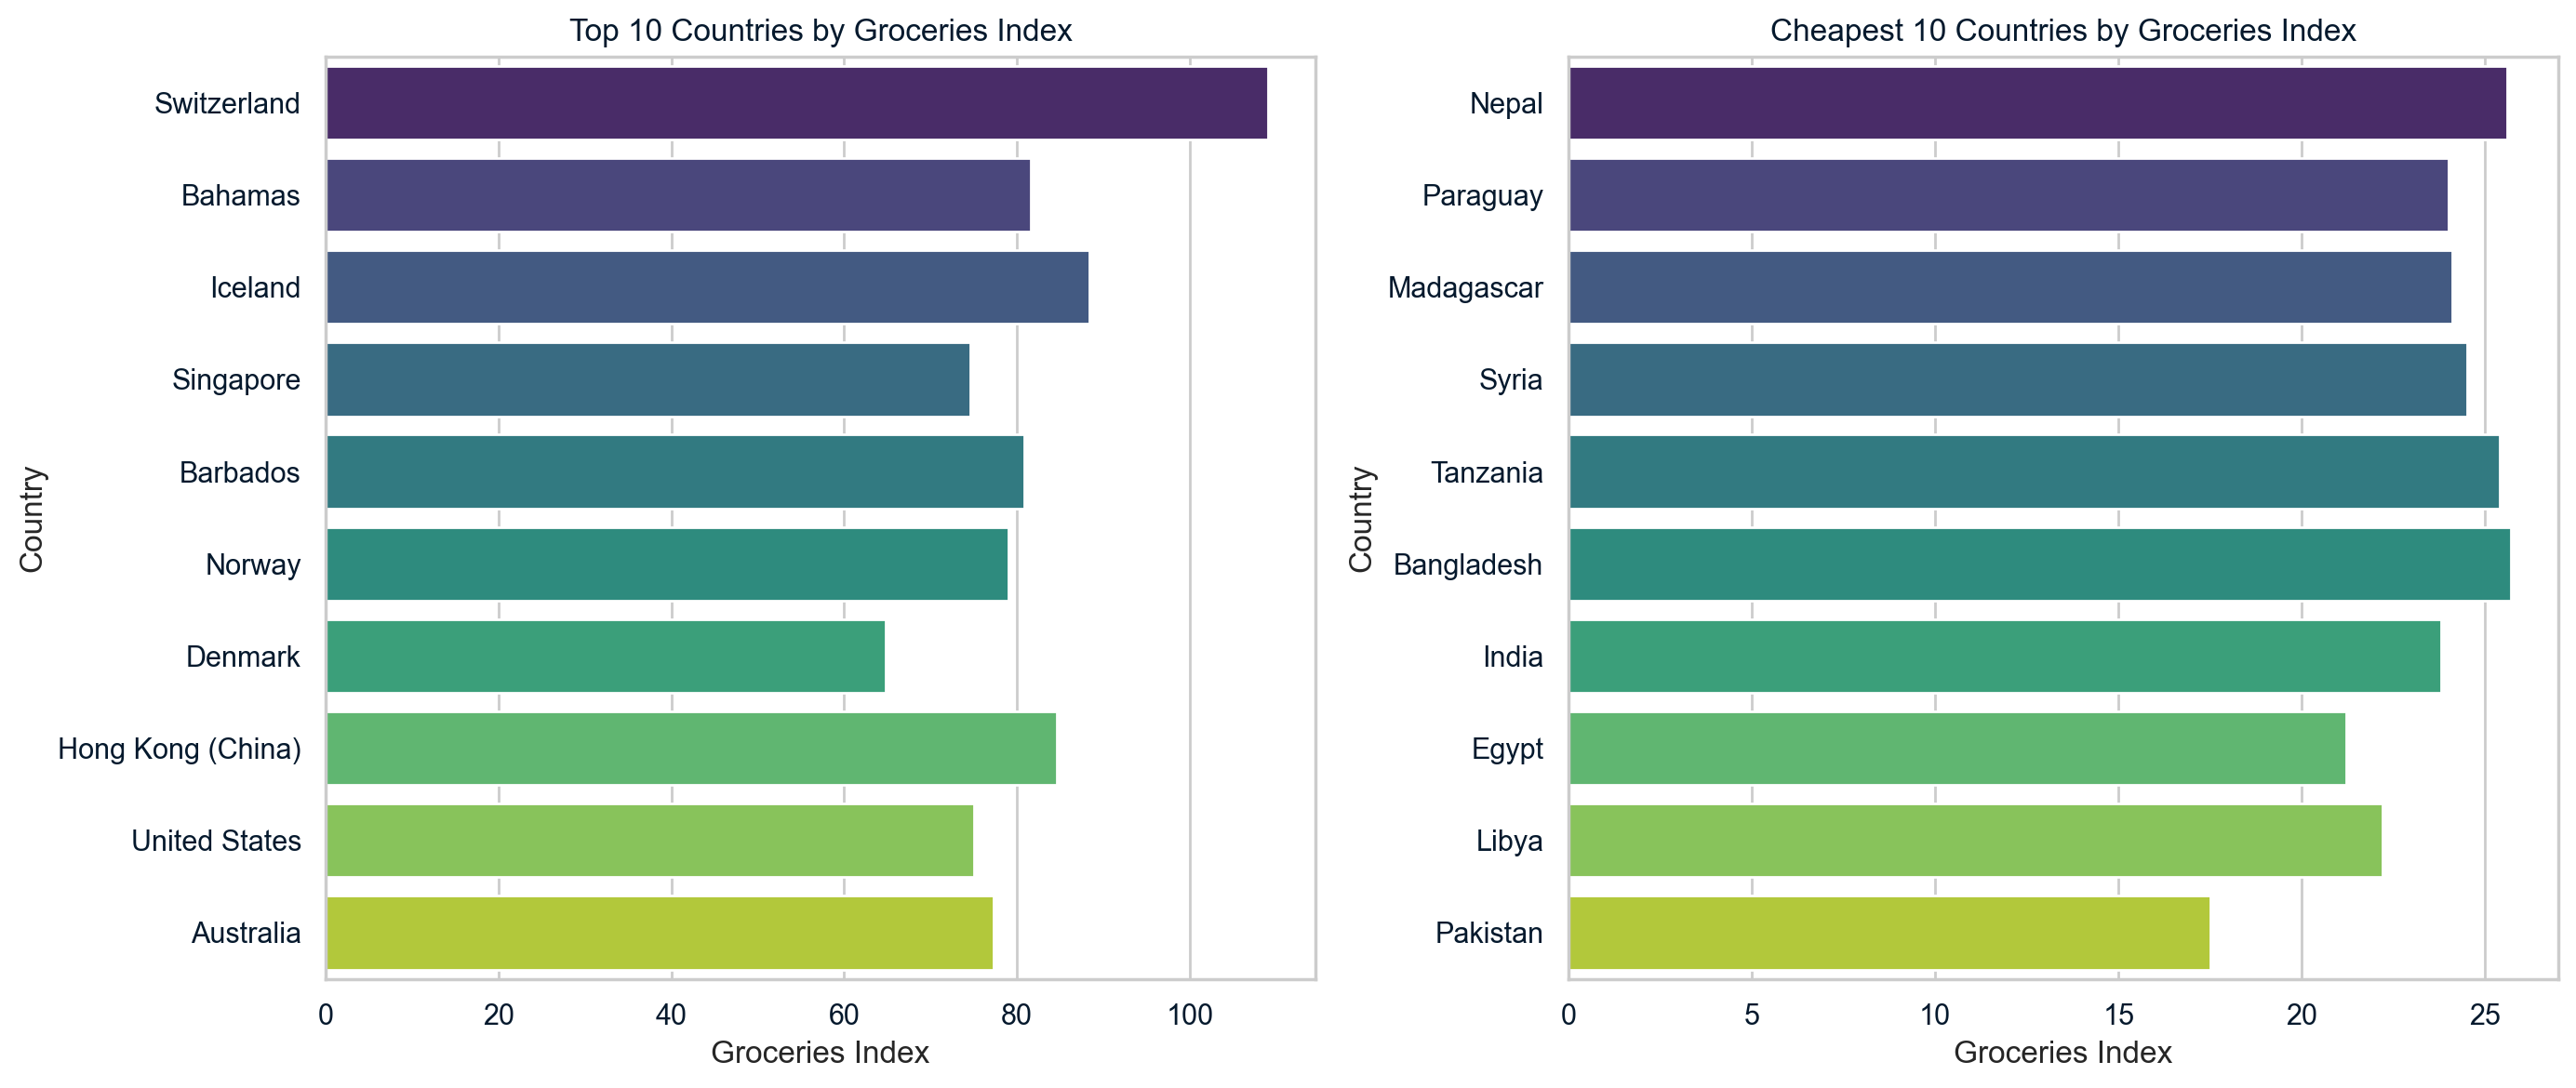

In [9]:
plot_index('Groceries Index')

- `Restaurant Price Index`

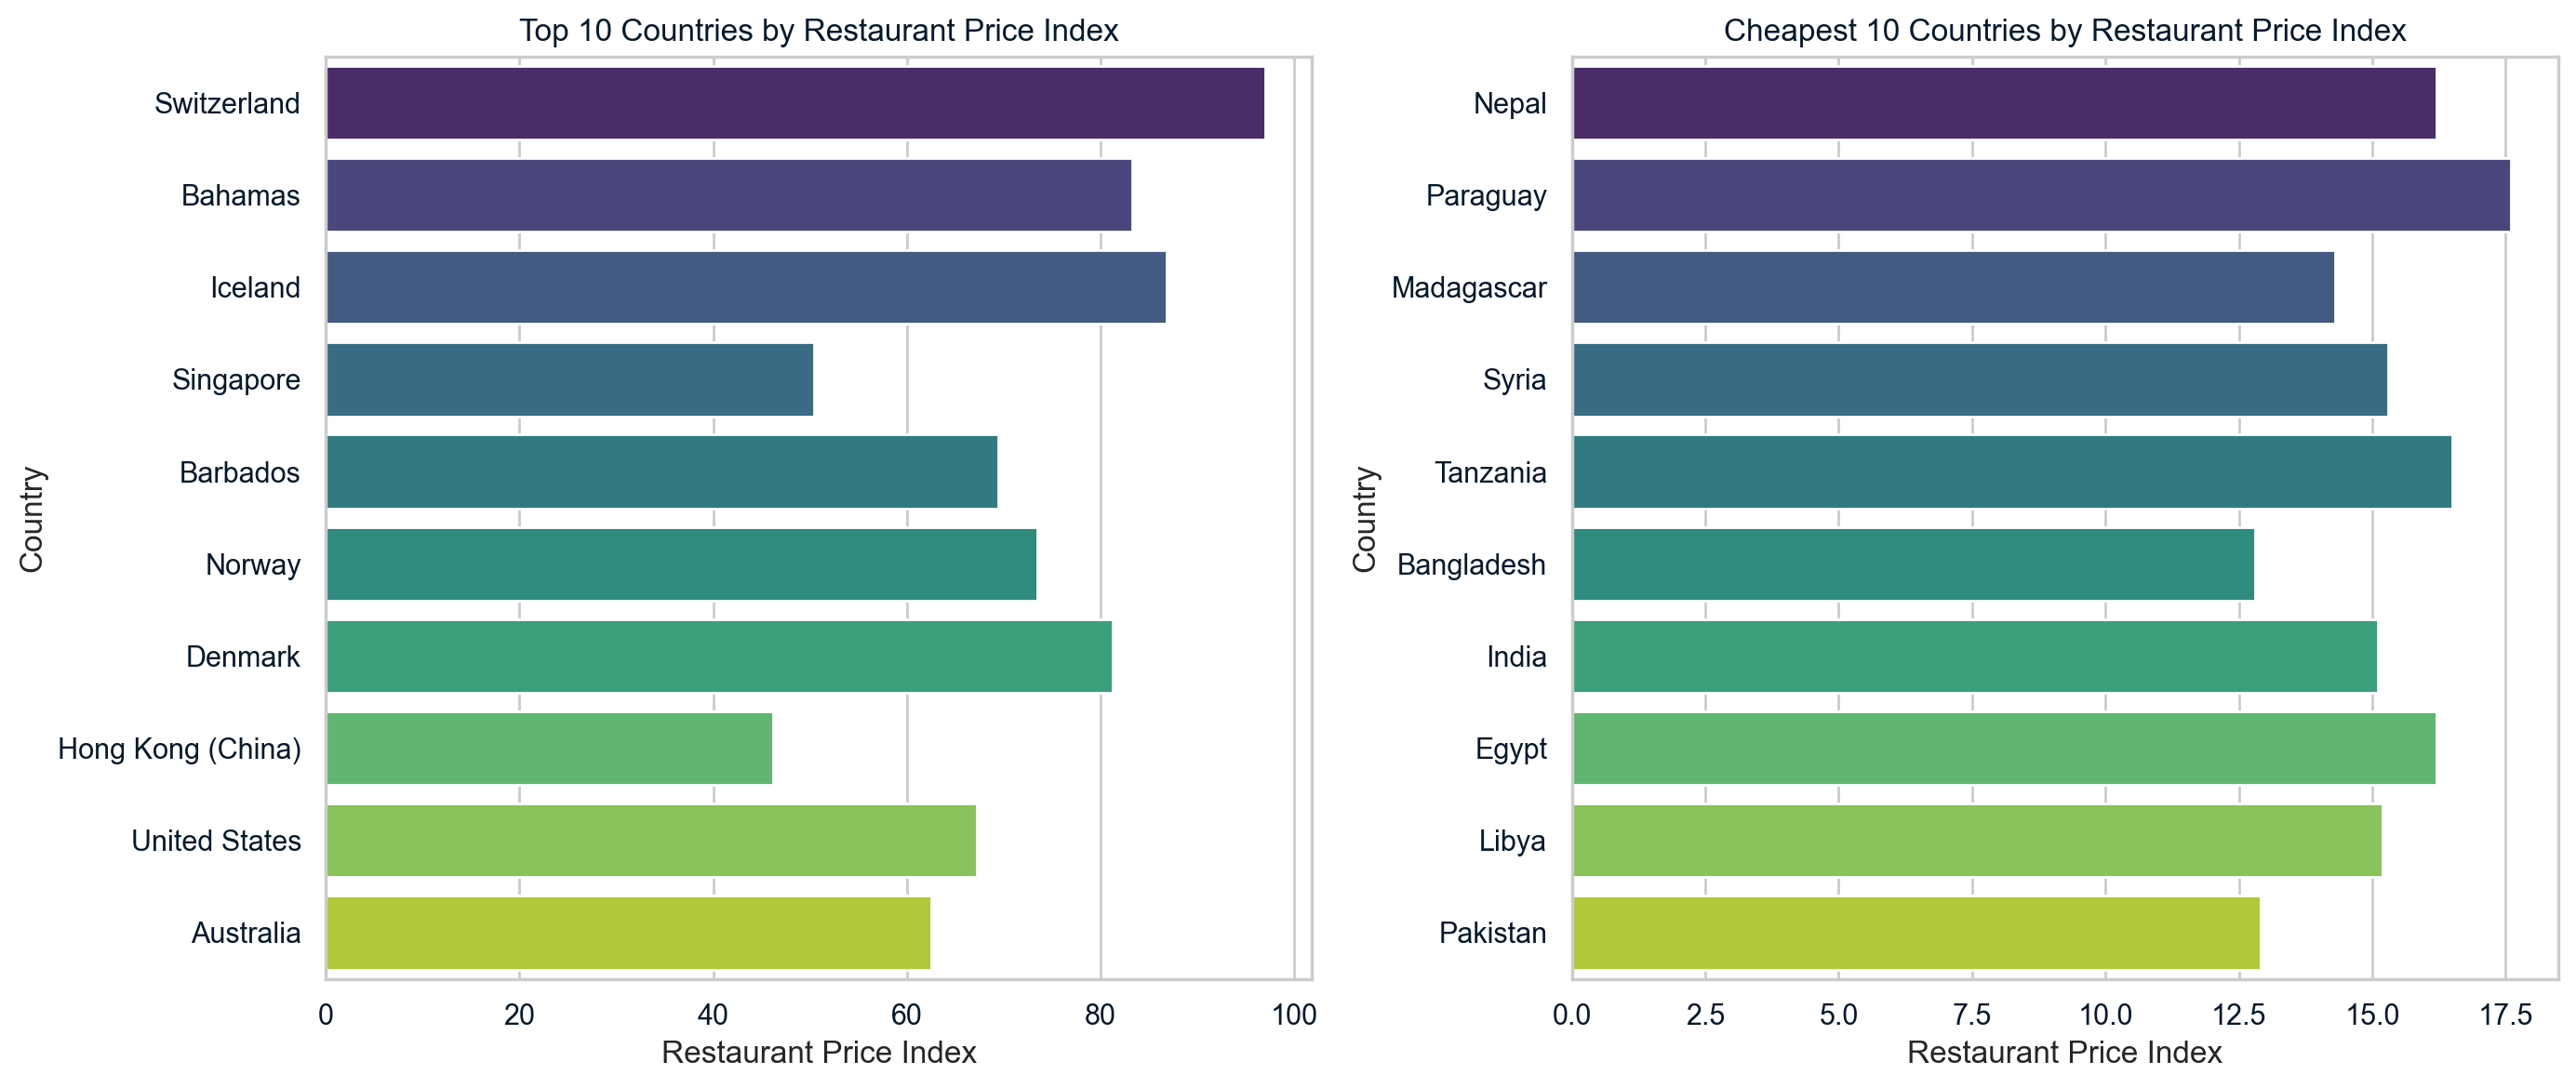

In [10]:
plot_index('Restaurant Price Index')

- `Rent Index`

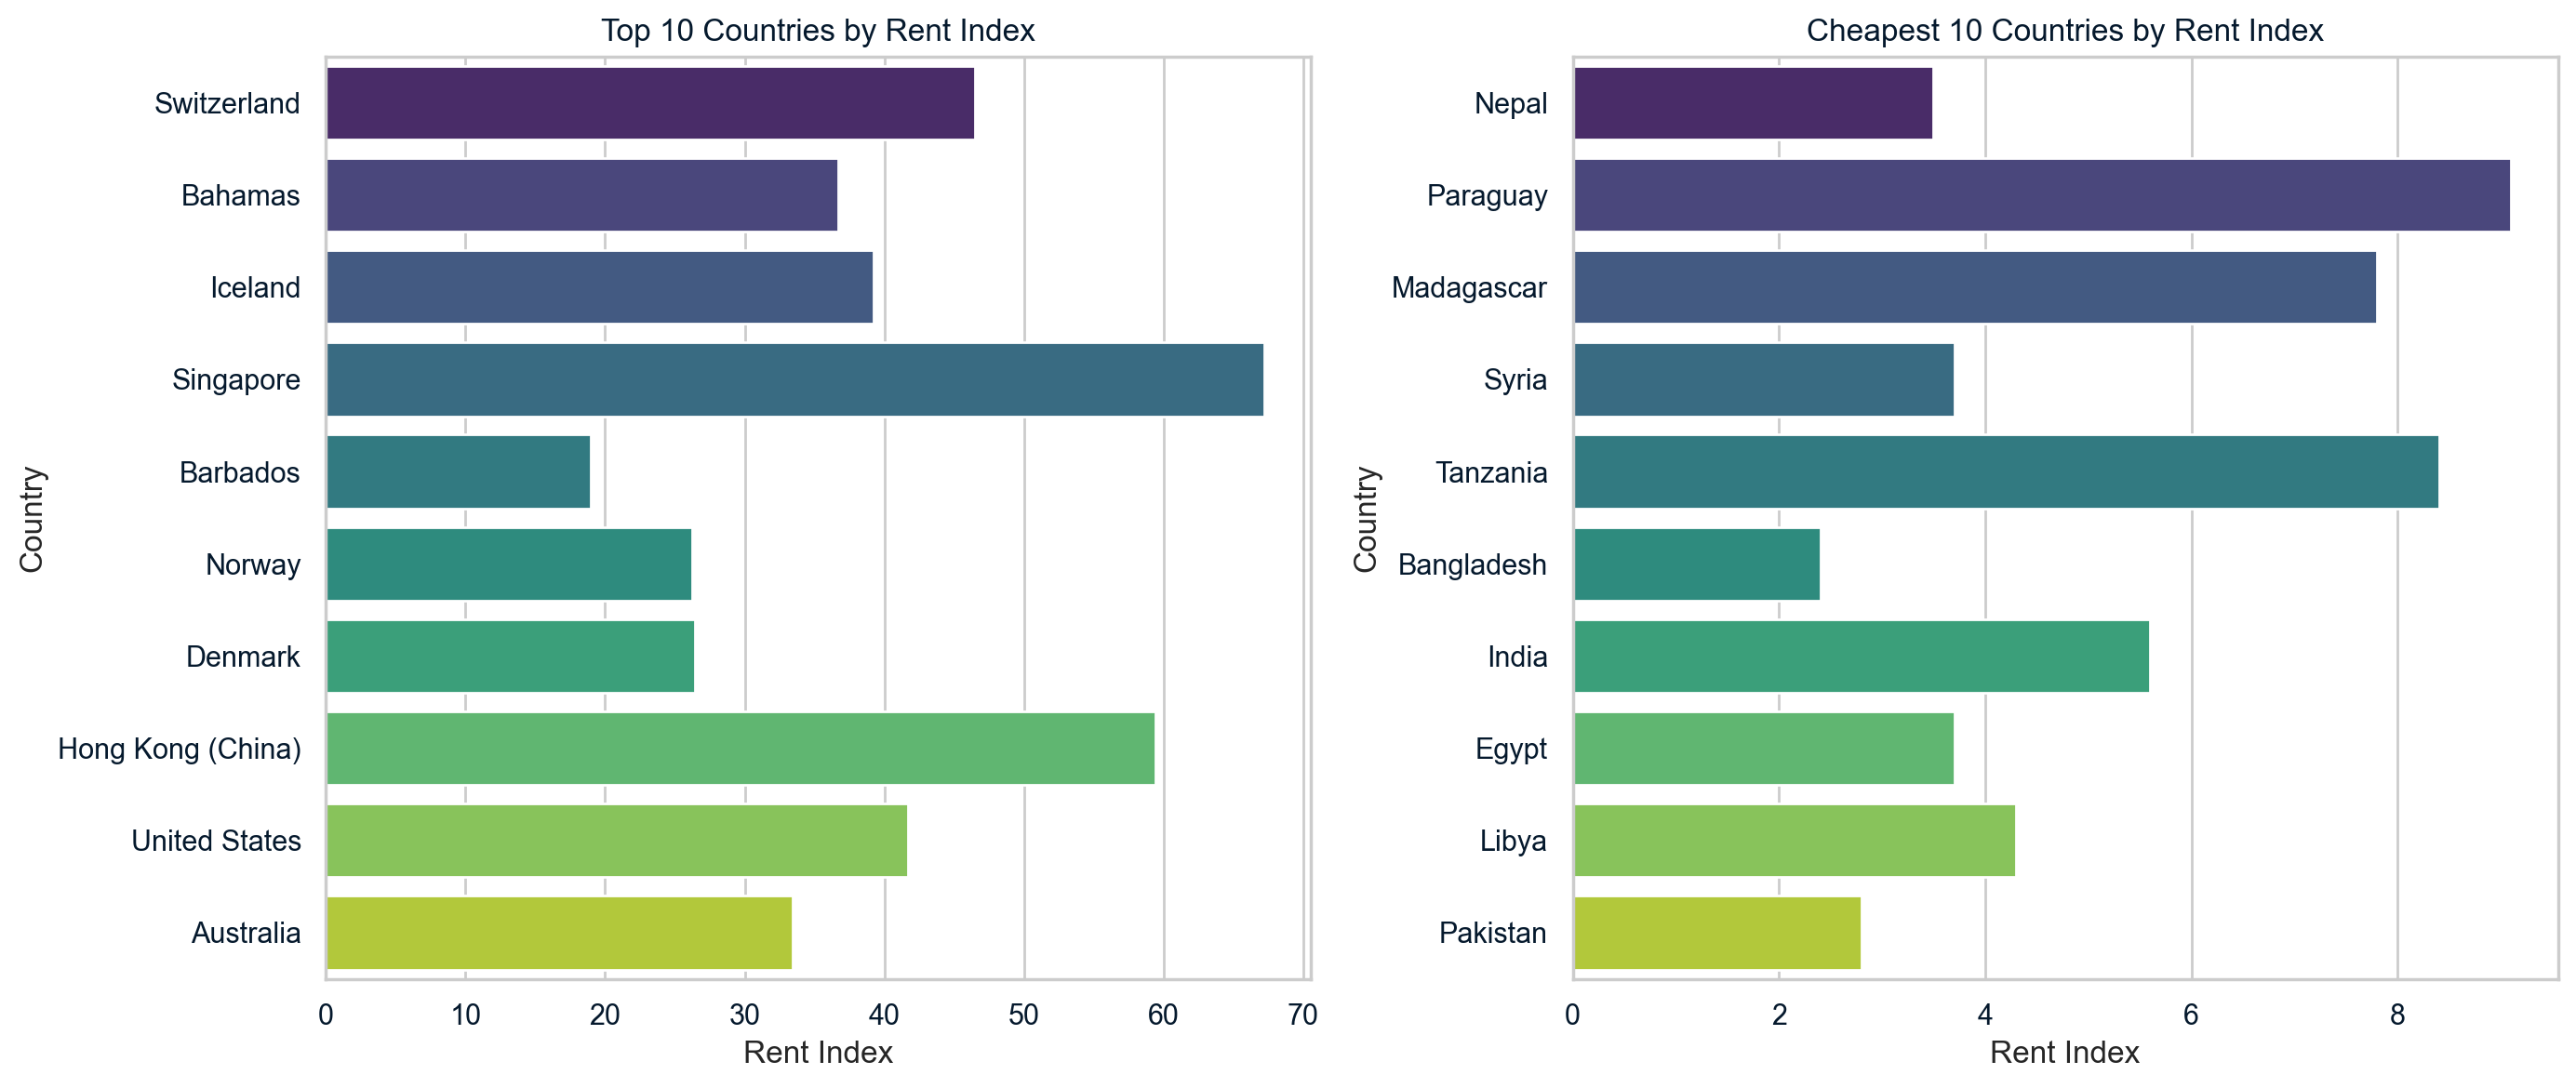

In [11]:
plot_index('Rent Index')

### Pairplot

- Visualize the distributions and relationships between the different indices for the top 10 and least 10 countries

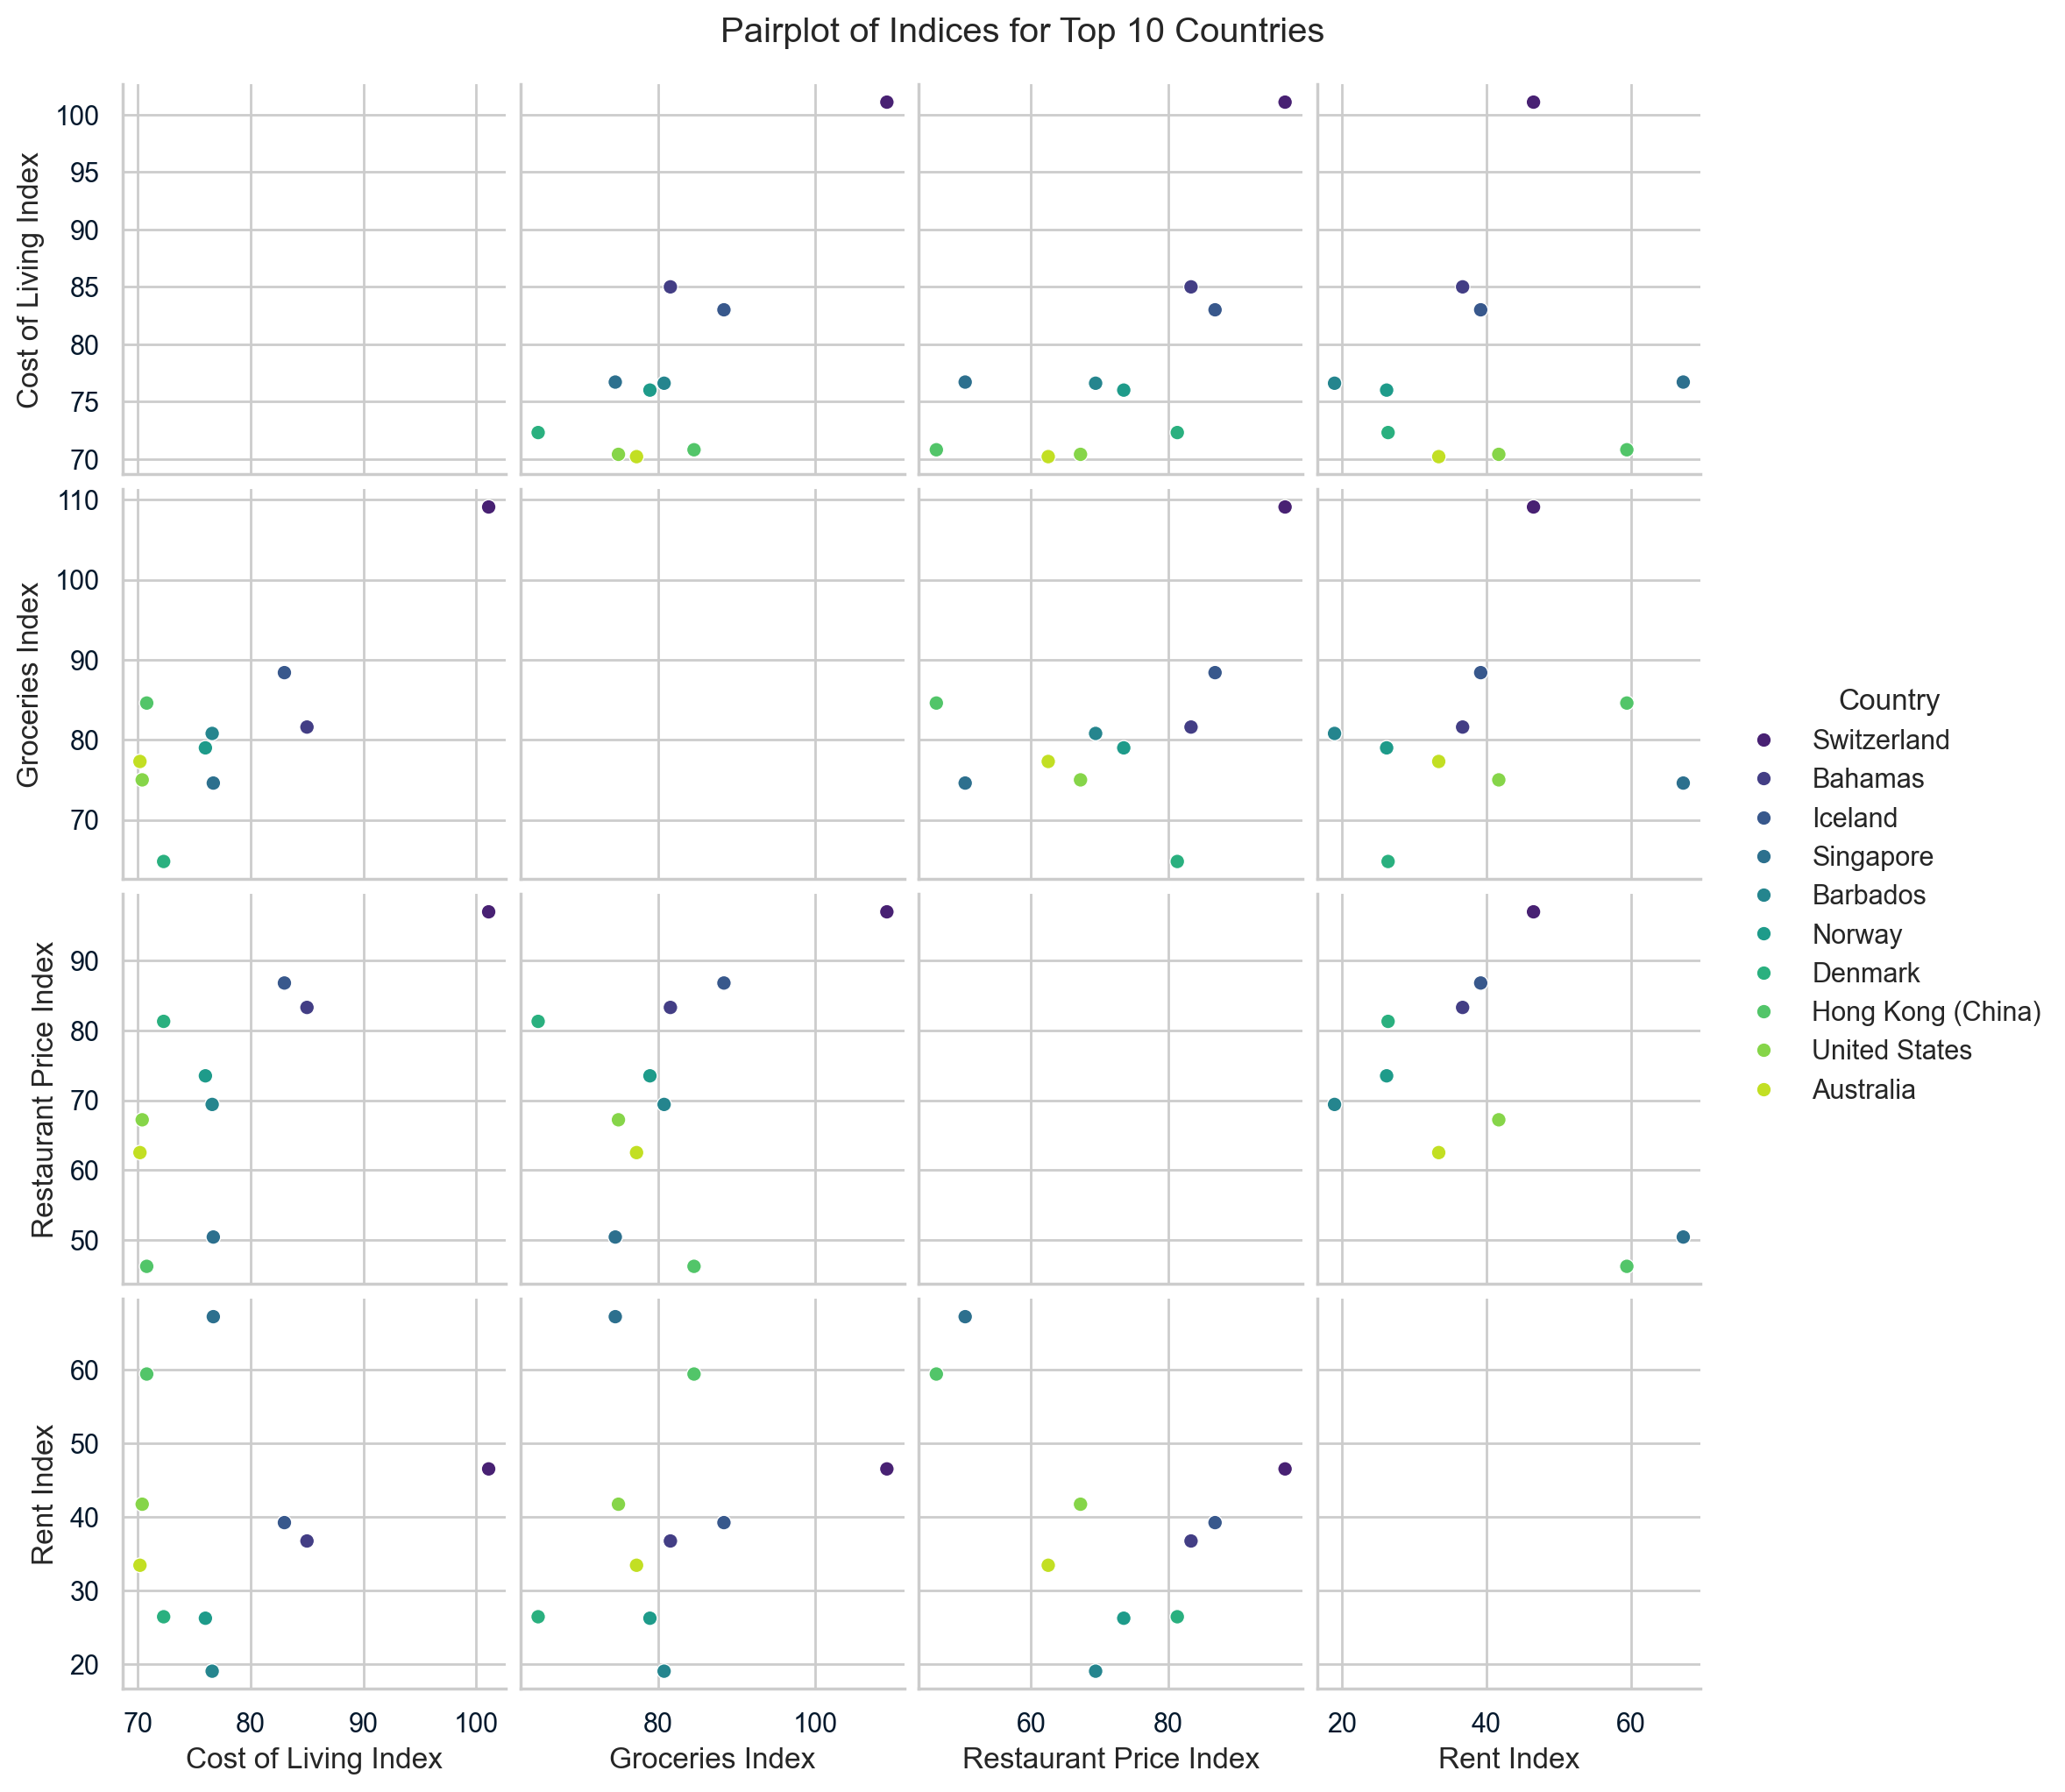

In [12]:
sns.pairplot(top_10[['Country', 'Cost of Living Index', 'Groceries Index', 'Restaurant Price Index', 'Rent Index']], hue='Country', palette='viridis')
plt.suptitle('Pairplot of Indices for Top 10 Countries', y=1.02)
plt.show()

This analysis of the top-tier cost of living countries demonstrates strong positive correlations among the cost of living index, groceries index, restaurant price index, and rent index. This indicates a consistent relationship wherein elevated values in one index are associated with higher values in the others. Nevertheless, variations across countries suggest that additional factors may contribute to overall cost of living disparities.

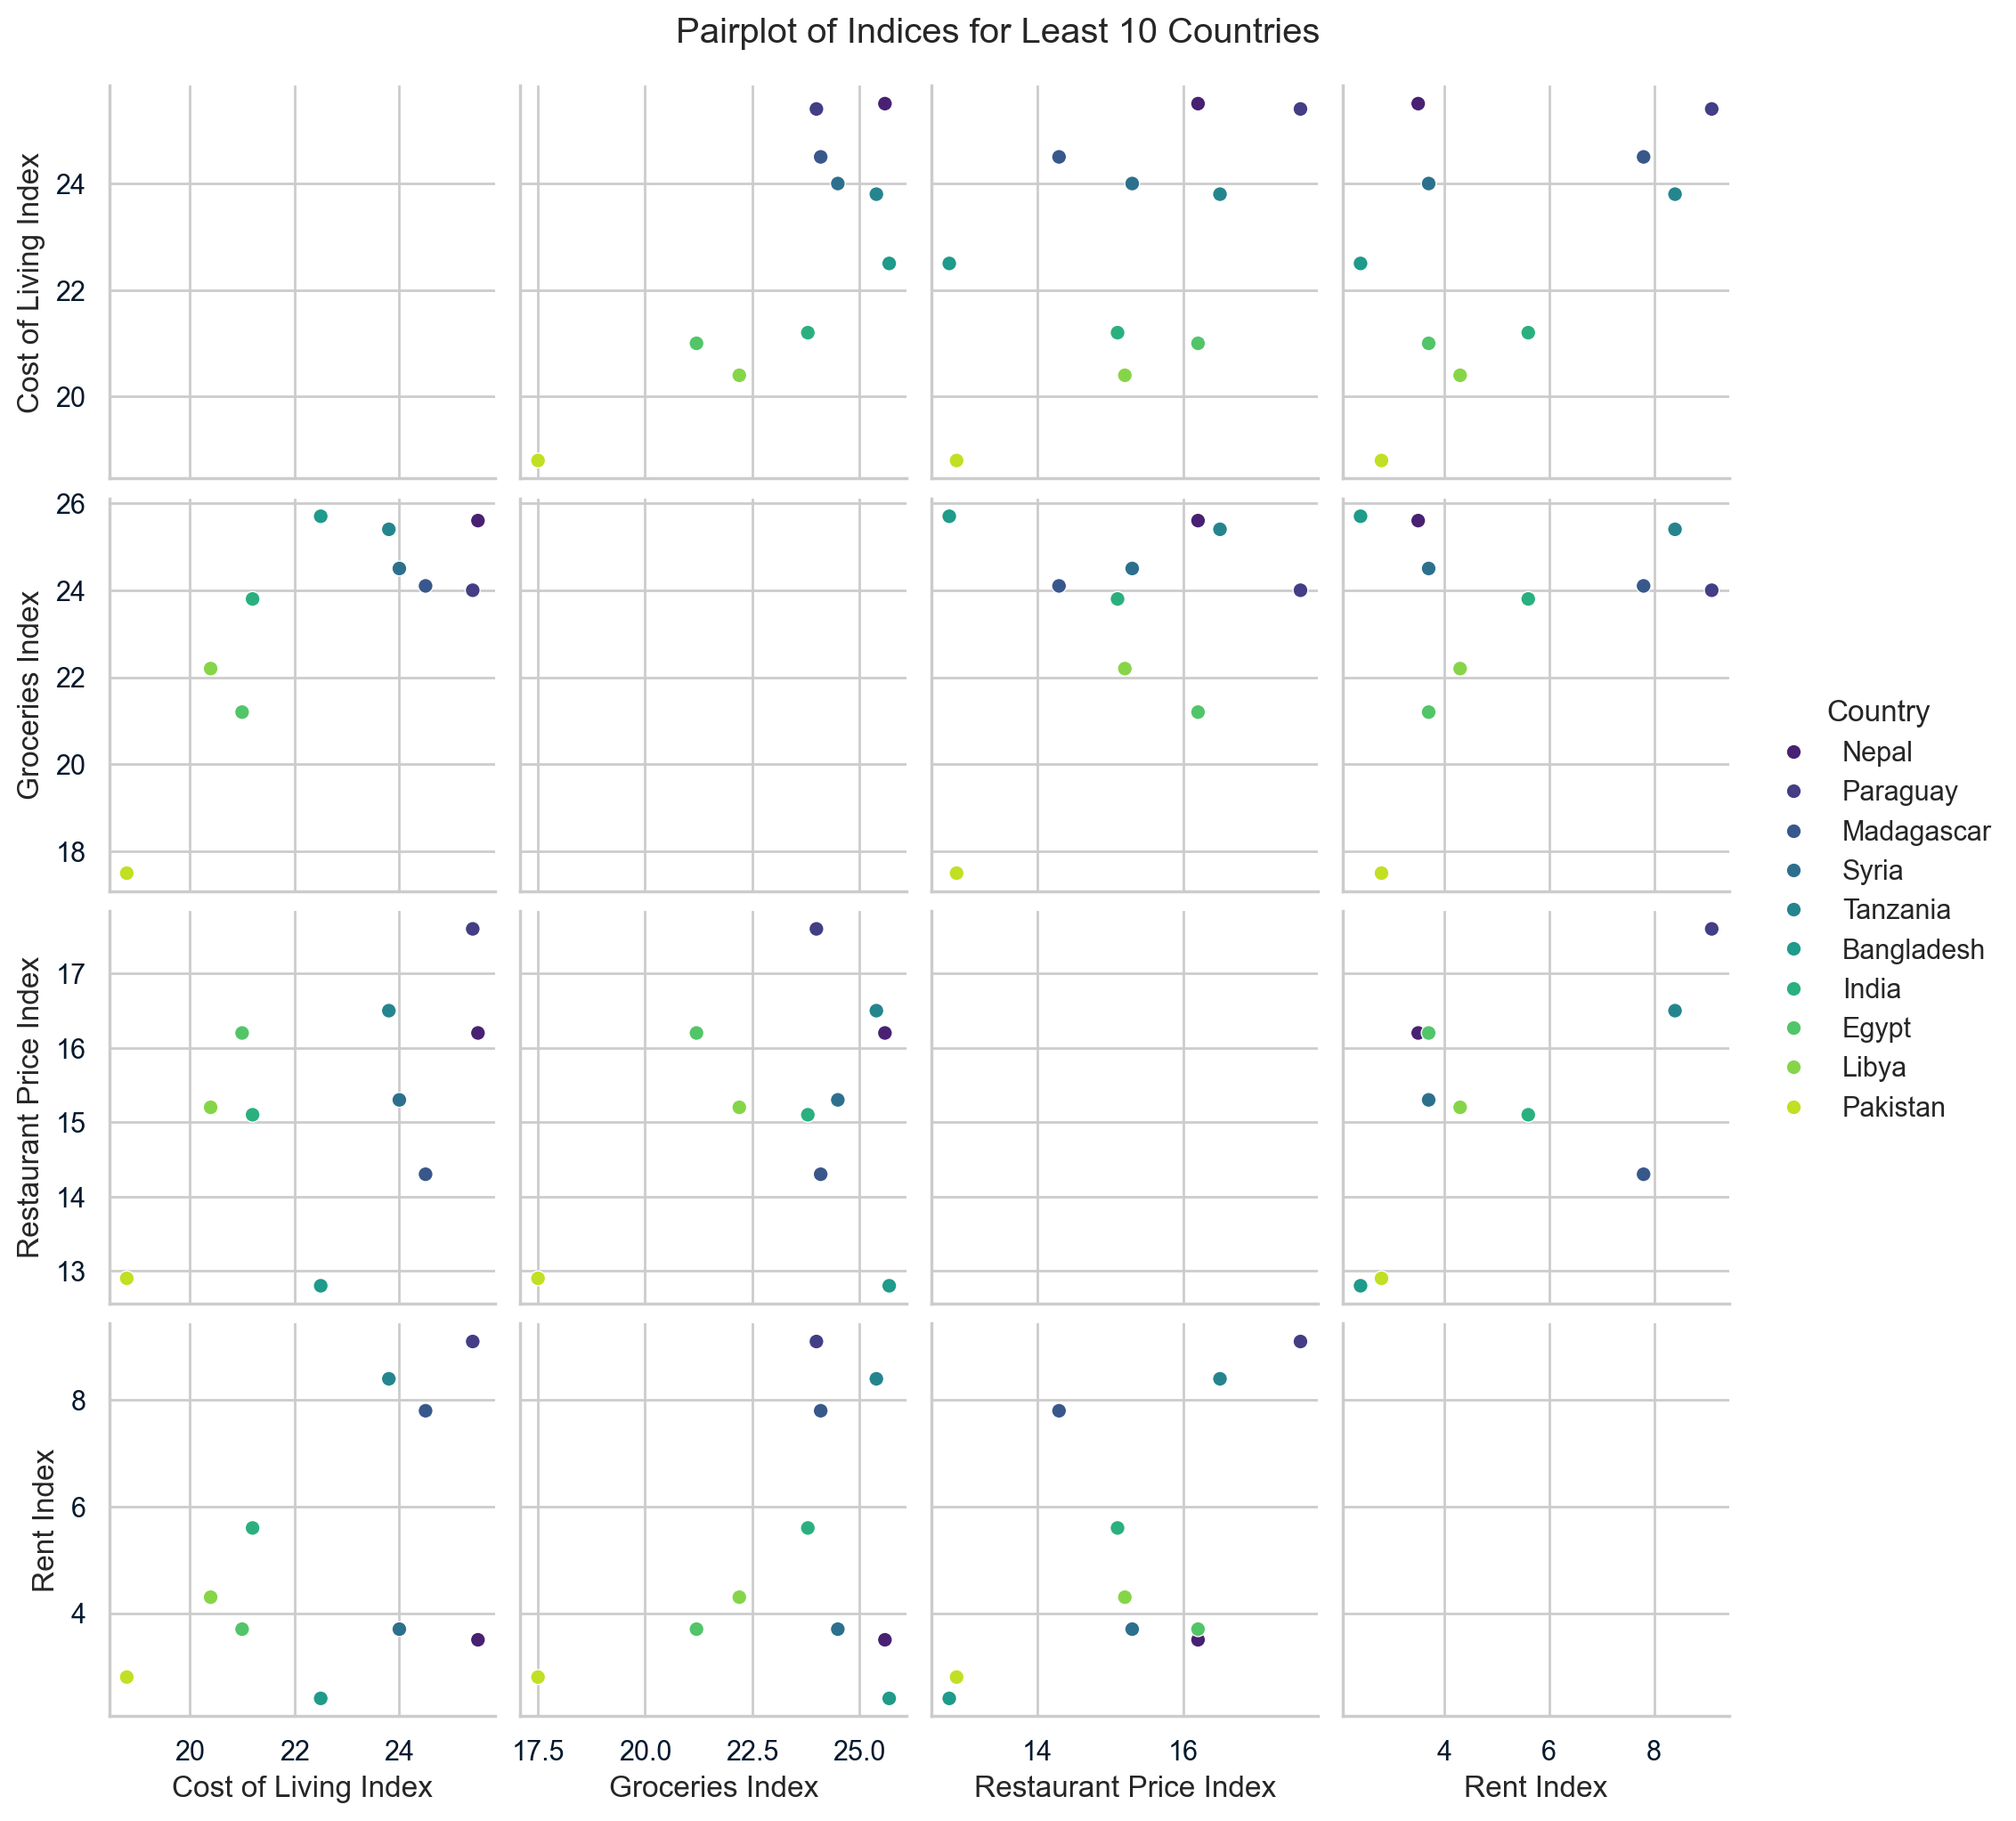

In [13]:
# Least 10 countries
sns.pairplot(least_10[['Country', 'Cost of Living Index', 'Groceries Index', 'Restaurant Price Index', 'Rent Index']], hue='Country', palette='viridis')
plt.suptitle('Pairplot of Indices for Least 10 Countries', y=1.02)
plt.show()

The pairplot analysis for the least expensive countries suggests a weaker or more scattered relationship between the cost of living index, groceries index, restaurant price index, and rent index compared to the top countries (previously analyzed). This indicates that the cost of living in these countries might be less influenced by the factors represented by these specific indices. It's possible that other factors not included in this analysis play a more prominent role in determining the overall cost of living in these locations.

### Correlation Matrix

- Visualize the correlation between different indices to understand their relationships

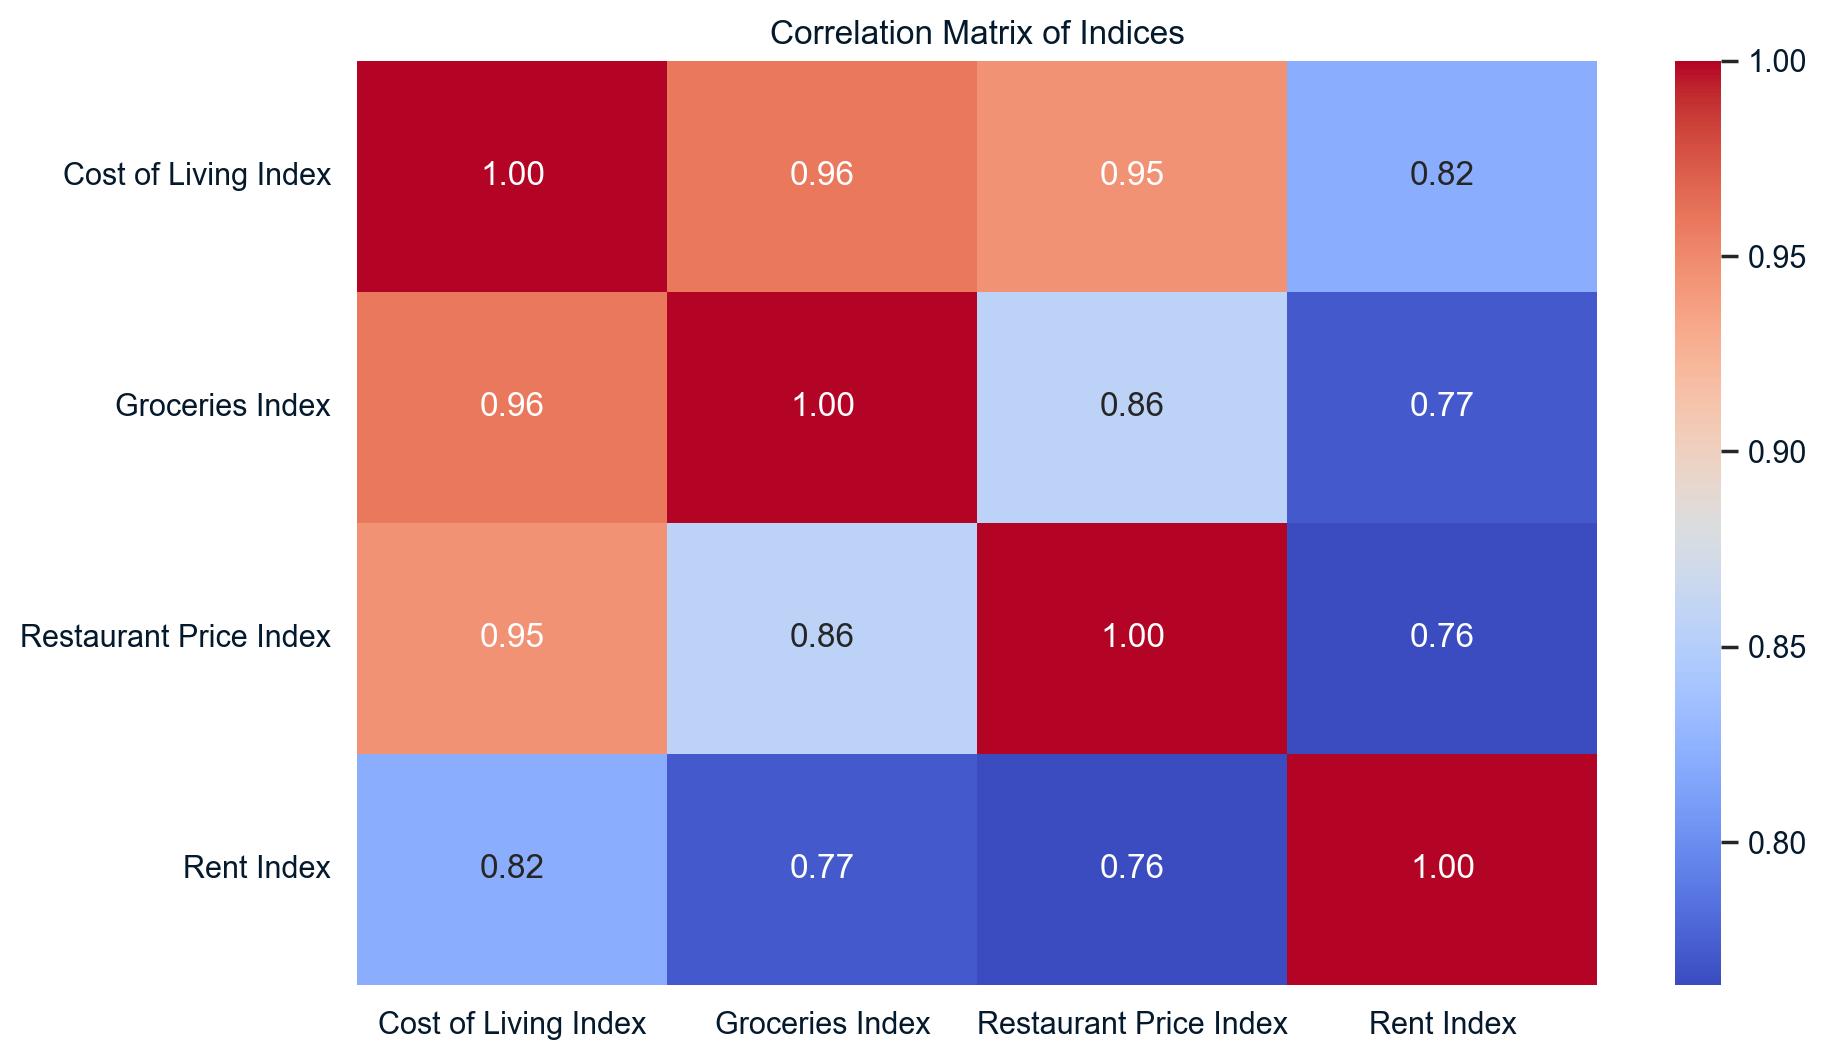

In [14]:
corr_matrix = costs[['Cost of Living Index', 'Groceries Index', 'Restaurant Price Index', 'Rent Index']].corr()

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Indices')
plt.show()

**Strong positive correlation**

1. **Cost of Living Index vs. Groceries Index (0.96)** - There's an extremely strong positive correlation between the cost of living index and the groceries index.
This indicates that places with a higher cost of living tend to also have higher grocery prices.

2. **Cost of Living Index vs. Restaurant Price Index (0.95)** - There's another very strong positive correlation between the cost of living index and the restaurant price index. This suggests that areas with a higher cost of living generally have more expensive restaurants.

**Moderate Positive Correlation**

1. **Groceries Index vs. Restaurant Price Index (0.86)** - A moderate positive correlation exists between groceries and restaurant prices. Places with costlier groceries tend to also have pricier restaurants, and vice versa.

2. **Cost of Living Index vs. Rent Index (0.82)** - There's a moderate positive correlation between the cost of living index and the rent index. This means that areas with a higher cost of living generally have higher rents, but the association is not quite as strong as with groceries or restaurant prices.


Overall, the correlation matrix reveals that the cost of living index has strong positive correlations with the groceries index and restaurant price index, indicating that these factors significantly influence the overall cost of living in a particular location.

## Categorization and Data Preparation

- Define features and target variable

In [15]:
features = ['Groceries Index', 'Restaurant Price Index', 'Rent Index']
target = 'Cost of Living Class'

- Define the classification function
    - Categorize 'Cost of Living Index' values into 'Low', 'Medium', and 'High' classes

In [16]:
# Classification function
def cost_of_living_class(i):
  classes = ["Low", "Medium", "High"]
  return classes[max(0, min(2, int(i // 40)))]

The function classifies an index as 'High' if it exceeds 80, 'Medium' if it falls between 40 and 80 (inclusive), and 'Low' for any value less than or equal to 40.

- New column for the classes

In [17]:
costs['Cost of Living Class'] = costs['Cost of Living Index'].apply(cost_of_living_class)

- Split data into features and target

In [18]:
X = costs[features]
y = costs[target]

## Dataset Partitioning and Augmentation

- Train-Test Split
    - Training features
    - Testing features
    - Training target variable
    - Testing target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- SMOTE resampling
- Apply SMOTE to the training data to oversample the minority class

In [20]:
sm = SMOTE(random_state=42, k_neighbors=1)
X_r_sample, y_r_sample = sm.fit_resample(X_train, y_train)

## Model Training

- Train a classification model using `RandomForestClassifier`

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_r_sample, y_r_sample)

RandomForestClassifier(random_state=42)

## Model Evaluation

- Generate predictions on the test set

In [22]:
y_pred = model.predict(X_test)

- Evaluate the model's performance
    - Show the accuracy 
    - Preview the classification report, `classification_report`

In [23]:
print(f"Model accuracy: {accuracy_score(y_test, y_pred)} or {int(accuracy_score(y_test, y_pred) * 100)}%")

Model accuracy: 0.76 or 76%


The model achieved an accuracy of 76%, indicating that it correctly predicted the cost of living class for 76% of the instances in the test dataset.

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.73      0.73      0.73        11
      Medium       0.77      0.77      0.77        13

    accuracy                           0.76        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.76      0.76      0.76        25



The model exhibits perfect precision, recall, and F1-score for the "High" cost of living class due to a single instance in the test data. For the "Low" class, the model demonstrates a precision, recall, and F1-score of 0.73, indicating opportunities for improvement in identifying and classifying these instances. The "Medium" class yields a precision, recall, and F1-score of 0.77, suggesting a moderate level of performance. 

Overall, while the model's performance on the "High" and "Medium" classes is promising, its classification of the "Low" cost of living category requires further attention.

## Model Validation

- Evaluate the model's generalizability using Stratified K-Fold Cross-Validation, `StratifiedKFold`

In [25]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, verbose=0) 

- Show the cross validation accuracy

In [26]:
print(f"Cross-Validated accuracy: {cv_scores.mean():.3f} or {cv_scores.mean() * 100:.2f}%")

Cross-Validated accuracy: 0.876 or 87.60%


The model demonstrates a significantly improved performance through cross-validation, achieving an average accuracy of **87.60%**. This suggests that the model is more robust and generalizable to unseen data compared to the initial test set evaluation.

## Hyperparameter Tuning Optimization

- Tune the hyperparameters of the Random Forest model to potentially improve performance.
    -  Create a GridSearchCV object
    -  Perform a Grid Search
    -  Display the best-found hyperparameters and the corresponding best cross-validated score

In [27]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [28]:
gs =  GridSearchCV(estimator=model, param_grid=params, cv=skf, n_jobs=-1)
gs.fit(X_r_sample, y_r_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [29]:
print(f"Best parameters:\n{gs.best_params_}")

Best parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


The optimal model configuration identified through Grid Search incorporates 50 decision trees, striking a balance between model complexity and overfitting. An unrestricted maximum tree depth was found to be beneficial, allowing the model to capture intricate patterns within the data. The model's performance was enhanced by setting the minimum number of samples required for node splitting to 10, preventing premature decision boundaries and facilitating the learning of complex relationships. Additionally, a minimum sample size of 1 at leaf nodes enabled the creation of more specific decision rules. 

It is essential to acknowledge that the identified hyperparameters represent the optimal configuration within the specified search space. Further improvements may be attainable through an expanded hyperparameter grid.

In [30]:
print(f"Score from Grid Search:\n{gs.best_score_:.4f} or {gs.best_score_ * 100:.2f}%")

Score from Grid Search:
0.9533 or 95.33%


The Grid Search process culminated in the identification of a model configuration that yielded a cross-validated accuracy of approximately 95.33%. This represents a significant enhancement over preceding models, demonstrating the efficacy of the hyperparameter tuning process in augmenting predictive capabilities. 

The elevated cross-validated accuracy is indicative of a robust model with promising generalization performance on unseen data.

## Model Comparison

Compare the Random Forest model with other classifiers to see if a different model might perform better.

### Logistic Regression

- Show model accuracy

In [31]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_r_sample, y_r_sample)
lr_y_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression accuracy: {lr_accuracy:.2f} or {int(lr_accuracy * 100)}%")

Logistic Regression accuracy: 0.76 or 76%


- Generate classification report

In [32]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.73      0.73      0.73        11
      Medium       0.77      0.77      0.77        13

    accuracy                           0.76        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.76      0.76      0.76        25



### Support Vector Classifier

- Show model accuracy

In [33]:
svc_clf = SVC()
svc_clf.fit(X_r_sample, y_r_sample)
svc_y_pred = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f"Support Vector Classifier accuracy: {svc_accuracy:.2f} or {int(svc_accuracy * 100)}%")

Support Vector Classifier accuracy: 0.80 or 80%


- Generate classification report

In [34]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.75      0.82      0.78        11
      Medium       0.83      0.77      0.80        13

    accuracy                           0.80        25
   macro avg       0.86      0.86      0.86        25
weighted avg       0.80      0.80      0.80        25



### K-Nearest Neighbors

- Show model accuracy

In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_r_sample, y_r_sample)
knn_y_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"K-Nearest Neighbors accuracy: {knn_accuracy:.2f} or {int(knn_accuracy * 100)}%")

K-Nearest Neighbors accuracy: 0.72 or 72%


- Generate classification report

In [36]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.67      0.73      0.70        11
      Medium       0.75      0.69      0.72        13

    accuracy                           0.72        25
   macro avg       0.81      0.81      0.81        25
weighted avg       0.72      0.72      0.72        25



## Feature Importance

Analyze the importance of each feature used in the Random Forect model to understand which factors most significantly influence the cost of living distribution.

- Extract feature importances

In [37]:
feature_importances = model.feature_importances_
feature_names = features
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

- Sort features by importance

In [38]:
feature_df = feature_df.sort_values(by='Importance', ascending=False)

- Visualize feature importance

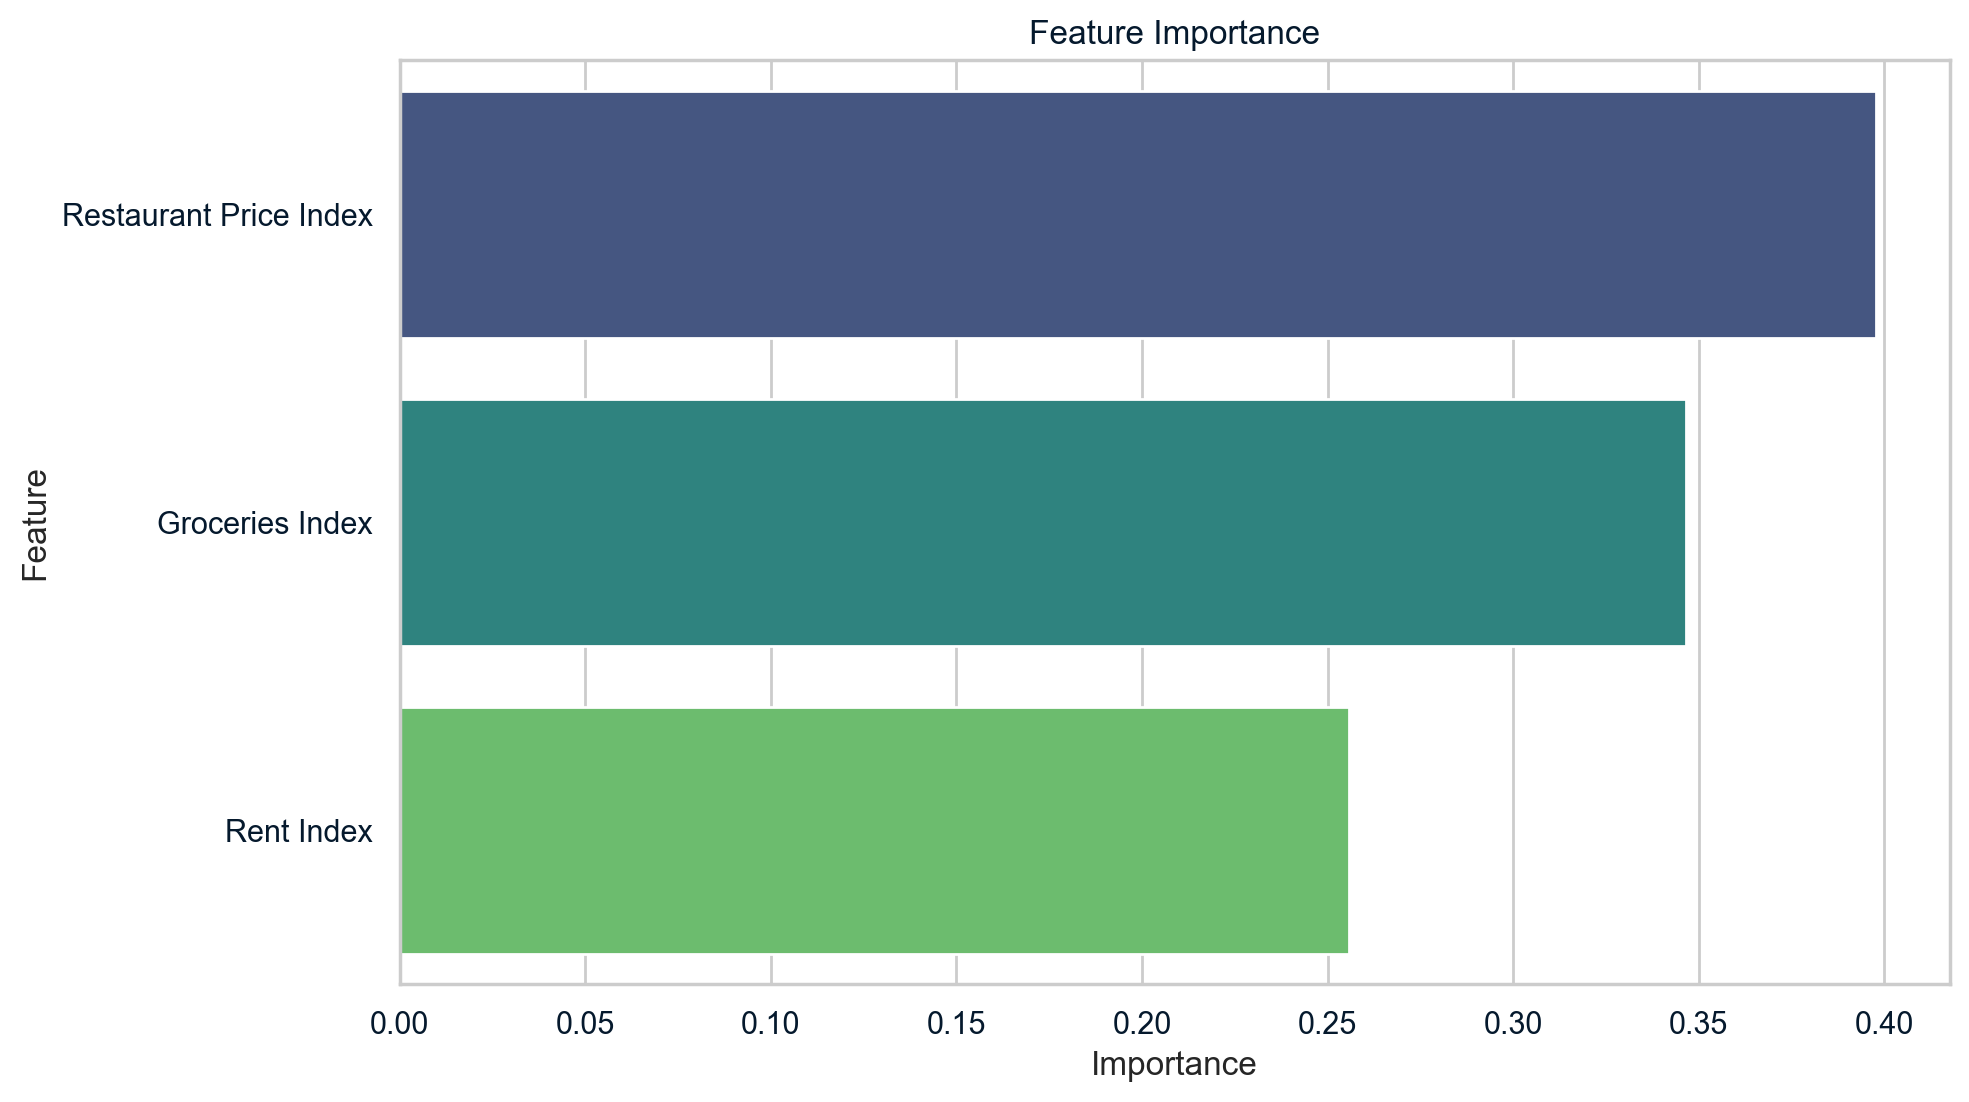

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()